In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('JGW-PPT')
import pandas as pd
from LinReg import PolyReg

os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

In [3]:
data_path = r"C:\Users\jgage\OneDrive - Stanford\2021\CHEM 274\Labs\E3\KOH titration.txt"
KHP_df = pd.read_csv(data_path, sep = ',')

# Calibration Data
steps_per_mL = 4800
n_KHP = 0.998 * (1.025*10**4)

cal_data = pd.DataFrame(((4 ,0.172478830179777,0.0004892423073316135),
                         (7 ,0.002718232570994735,0.0004949013695150583),
                         (10,-0.17839986224297638,0.0005452112154405124)),
                        columns=['pH', 'mean potential', 'std dev'])
cal_reg = PolyReg(cal_data['mean potential'], cal_data['pH'], 1)



KHP_df['V_KOH / mL'] = KHP_df['step'] / steps_per_mL
KHP_df['pH cal'] = cal_reg.eval(KHP_df['mean potential'])

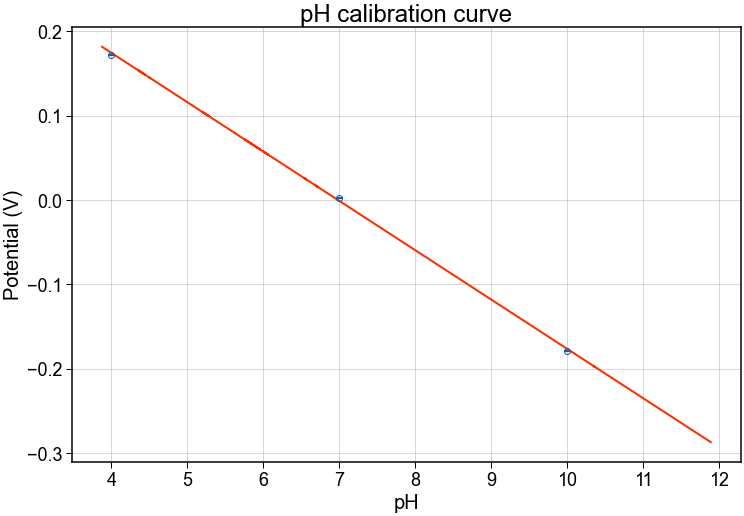

In [4]:
# Sanity Check
fig, ax = plt.subplots()
ax.errorbar(x = cal_data['pH'], y = cal_data['mean potential'] , yerr = cal_data['std dev'],  fmt='o', fillstyle='none')
ax.set_title('pH calibration curve')
ax.set_ylabel('Potential (V)')
ax.set_xlabel('pH')
ax.plot(KHP_df['pH cal'], KHP_df['mean potential'])

# ax.set_xticks(np.arange(0, len(sol_num)))
# ax.set_xticklabels(sol_num)

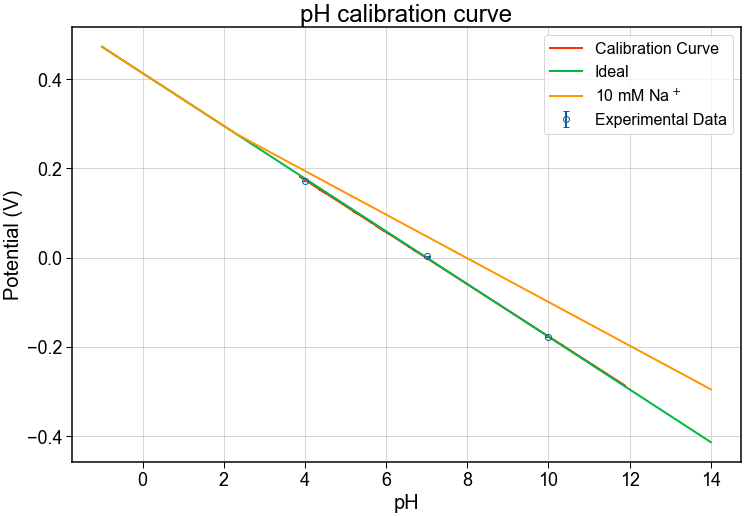

In [5]:
aH = np.linspace(10**(-14), 10, 2000)

def E_predict(aH, kHI, aI):
    '''
    Returns E_cell based on Nicolsky-Eisenman equation
    '''
    R, T, F = 8.314, 298, 96485
    m = R * T * np.log(10)/ F
    aHref = 10**(-7)
    num = aH + (kHI*aI)
    denom = aHref
    return m*np.log10(num/denom)

fig2, ax2 = plt.subplots()
ax2.errorbar(x = cal_data['pH'], y = cal_data['mean potential'] , yerr = cal_data['std dev'],  fmt='o', fillstyle='none', label='Experimental Data')
ax2.set_title('pH calibration curve')
ax2.set_ylabel('Potential (V)')
ax2.set_xlabel('pH')
ax2.plot(KHP_df['pH cal'], KHP_df['mean potential'], label='Calibration Curve')
ax2.plot(-np.log10(aH), E_predict(aH, 0, 0.01), label='Ideal')
ax2.plot(-np.log10(aH), E_predict(aH, 10**(-10), 0.01), label='10 mM Na$^+$')
ax2.legend()


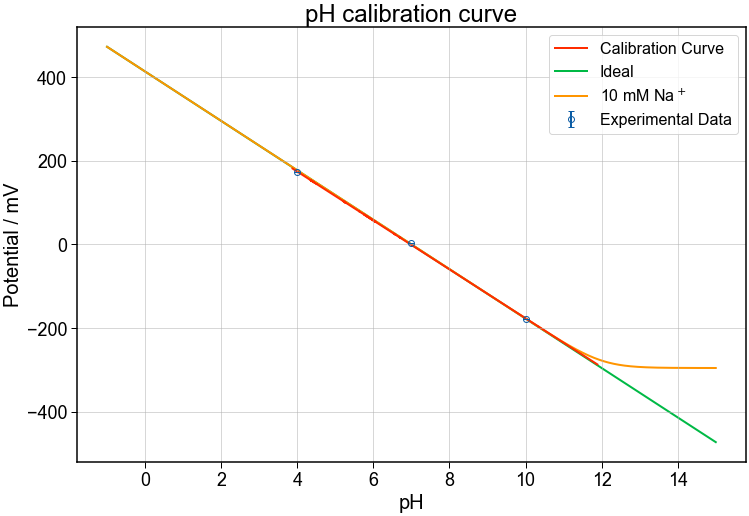

In [15]:
x_pH = np.linspace(-1, 15, 20000)

def E_predict(aH, kHI, aI):
    '''
    Returns E_cell based on Nicolsky-Eisenman equation
    '''
    R, T, F = 8.314, 298, 96485
    m = R * T * np.log(10)/ F
    aHref = 10**(-7)
    num = aH + (kHI*aI)
    denom = aHref
    return m*np.log10(num/denom)

y_scale_factor = 10**3

fig2, ax2 = plt.subplots()
ax2.errorbar(x = cal_data['pH'],
             y = y_scale_factor * cal_data['mean potential'] ,
             yerr = cal_data['std dev'],
             fmt='o', fillstyle='none', label='Experimental Data', zorder=2)

ax2.plot(KHP_df['pH cal'],
         y_scale_factor * KHP_df['mean potential'],
         label='Calibration Curve', zorder=1)
ax2.plot(x_pH,
         y_scale_factor * E_predict(10**(-x_pH), 0, 0.01),
         label='Ideal', zorder=0)
ax2.plot(x_pH,
         y_scale_factor * E_predict(10**(-x_pH), 10**(-10), 0.01),
         label='10 mM Na$^+$', zorder=0)

ax2.set_title('pH calibration curve')
ax2.set_ylabel('Potential / mV')
ax2.set_xlabel('pH')
ax2.legend()

C:\Users\jgage\AppData\Local\Temp/ipykernel_15588/1701994003.py:9: RuntimeWarning: invalid value encountered in log
  ax.plot(-np.log10(aH), E_predict(-np.log(x_pH), 0, 0.001) - E_predict(-np.log(x_pH), 0, 0.001), label='Ideal')
C:\Users\jgage\AppData\Local\Temp/ipykernel_15588/1842283225.py:12: RuntimeWarning: invalid value encountered in log10
  return m*np.log10(num/denom)


ValueError: x and y must have same first dimension, but have shapes (2000,) and (20000,)

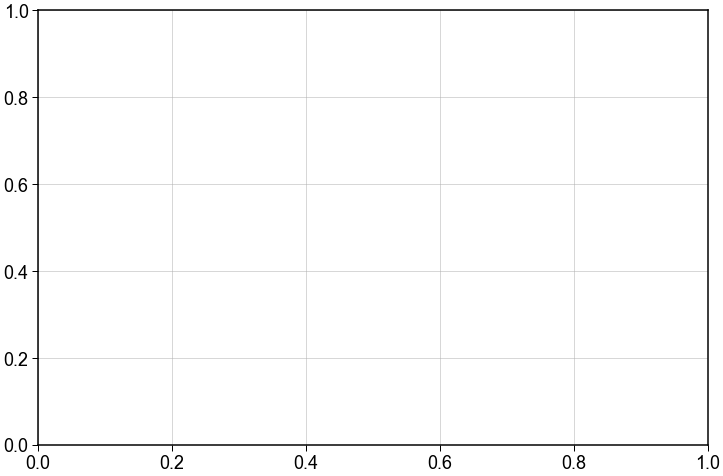

In [16]:
def pH_from_E(E, kHI, aI):
    R, T, F = 8.314, 298, 96485
    m = R * T / F
    aHref = 10**(-7)
    return np.log10(np.exp(E/m)*aHref - (kHI*aI))


figgy, ax = plt.subplots()
ax.plot(-np.log10(aH), E_predict(-np.log(x_pH), 0, 0.001) - E_predict(-np.log(x_pH), 0, 0.001), label='Ideal')
ax.plot(-np.log10(aH),
        pH_from_E(E_predict(-np.log(x_pH), 10**(-10), 0.001),10**(-10), 0.001) - pH_from_E(E_predict(-np.log(x_pH), 0, 0.001), 0, 0.001),
label='10 mM Na$^+$')
ax.set_title('pH calibration curve')
ax.set_ylabel('Potential (V)')
ax.set_xlabel('$\Delta$pH')


ax.legend()

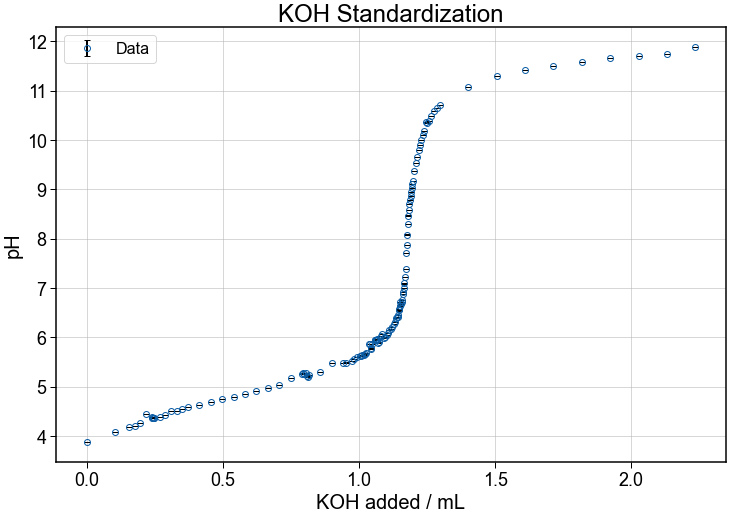

In [7]:
xdata = KHP_df['V_KOH / mL']
ydata = KHP_df['pH cal']
fig3, ax3 = plt.subplots()
ax3.errorbar(x = xdata , y = ydata,
            yerr = KHP_df['std dev'], fmt='o', mfc='none', ecolor='k', label='Data')

ax3.set_title('KOH Standardization')
ax3.set_xlabel('KOH added / mL')
ax3.set_ylabel('pH')

# ax3.plot(xdata, y_model, label='Model')
ax3.legend()

In [8]:
j = E_predict(10**-7, 0, 0.01)
